<H1>DS 7331 Mini Lab Fall 2023</H1>

<H3>Team Members: Jae Chung, Matthew David, Nick Mueller, Alex Thibeaux</H3>
<br>
<H2>Kaggle Diabetes Dataset</H2>
<H4> Libraries Used: </H4>

In [83]:
# Libraries
import numpy as np
import pandas as pd
import opendatasets as od # Loading in Kaggle Datasets
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

<H2> Preparing Data for Logistic Regression </H2>

In [84]:

# Define the file path
file_path = r'C:\Users\matth\Machine Learning\Proj1\preclean.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [85]:
# Randomly sample 15,000 rows when diabetes_binary is "0"
data1_0 = df[df['Diabetes_binary'] == 0].sample(n=15000, random_state=42)

# Randomly sample 15,000 rows when diabetes_binary is "1"
data1_1 = df[df['Diabetes_binary'] == 1].sample(n=15000, random_state=42)

# Concatenate the two sampled DataFrames into data1
data1 = pd.concat([data1_0, data1_1])

# Reset the index of the new DataFrame
data1.reset_index(drop=True, inplace=True)

# Display the first few rows of data1
data1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,5.0,0.0,0.0,4.0,6.0,7.0
1,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,5.0
2,0.0,1.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,3.0,2.0,0.0,0.0,2.0,6.0,8.0
3,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,3.0,5.0,1.0,1.0,13.0,6.0,1.0
4,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,5.0,6.0


In [90]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       30000 non-null  float64
 1   HighBP                30000 non-null  float64
 2   HighChol              30000 non-null  float64
 3   CholCheck             30000 non-null  float64
 4   BMI                   30000 non-null  float64
 5   Smoker                30000 non-null  float64
 6   Stroke                30000 non-null  float64
 7   HeartDiseaseorAttack  30000 non-null  float64
 8   PhysActivity          30000 non-null  float64
 9   Fruits                30000 non-null  float64
 10  Veggies               30000 non-null  float64
 11  HvyAlcoholConsump     30000 non-null  float64
 12  AnyHealthcare         30000 non-null  float64
 13  NoDocbcCost           30000 non-null  float64
 14  GenHlth               30000 non-null  float64
 15  MentHlth           

<H4> Checking for Outliers in BMI </H4>

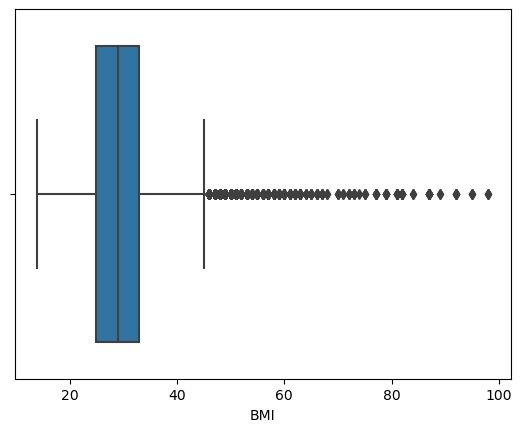

In [91]:

# Box plot to visualize potential outliers
sns.boxplot(x=data1['BMI'])
plt.show()

<H4> Assesment </H4>

When examining the BMI distribution, it becomes apparent that there are several outliers beyond the third quartile, along with unusually high BMI values that surpass the typical range of 18-40. Before considering the removal of these outliers, let's explore the logged variable to determine if it resolves this issue.

In [92]:
data1['BMI_transformed'] = np.log(data1['BMI'])

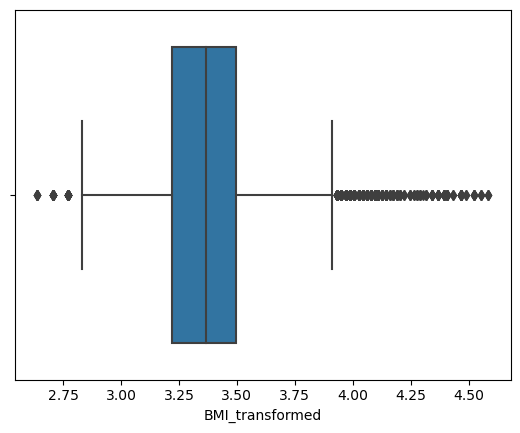

In [93]:
# Box plot to visualize potential outliers
sns.boxplot(x=data1['BMI_transformed'])
plt.show()

Here, we observe that even after applying a logarithmic transformation to BMI, there are still numerous outliers, including some below the first quartile. As a result, we will proceed by removing these outliers

In [94]:
# Drop the transformed BMI column
data1 = data1.drop(columns=['BMI_transformed'])

In [95]:
# Calculate IQR for BMI
Q1 = data1['BMI'].quantile(0.25)
Q3 = data1['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data1['BMI'] < lower_bound) | (data1['BMI'] > upper_bound)

# Optionally, remove outliers from the DataFrame
data1_cleaned = data1[~outliers]

# Print the identified outliers
print("Outliers:")
print(data1[outliers])

Outliers:
       Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
57                 0.0     1.0       1.0        1.0  87.0     1.0     0.0   
73                 0.0     0.0       0.0        1.0  49.0     0.0     0.0   
115                0.0     1.0       1.0        1.0  55.0     0.0     0.0   
166                0.0     0.0       0.0        1.0  50.0     0.0     0.0   
310                0.0     0.0       1.0        1.0  57.0     0.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
29922              1.0     1.0       0.0        1.0  50.0     0.0     0.0   
29926              1.0     1.0       1.0        1.0  55.0     0.0     1.0   
29969              1.0     0.0       1.0        1.0  46.0     0.0     0.0   
29971              1.0     0.0       1.0        1.0  84.0     0.0     0.0   
29984              1.0     1.0       1.0        1.0  64.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealth

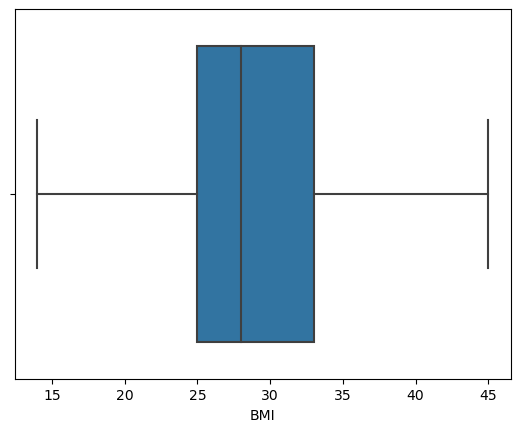

In [96]:
# Box plot to visualize potential outliers
sns.boxplot(x=data1_cleaned['BMI'])
plt.show()

In this boxplot, it is evident that after the removal of outliers, all the remaining values are now contained within the Interquartile Range (IQR).

<H4> Fixing the other variables </H4> 

4 other features are currently ordinal for the purpose of this analysis we will utilize one hot encoding and to prepare these variables for  Logistig and SVM. We are utilizing these codebooks to decide how to divide these features

https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook

https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

<H4>One Hot Encoding </H4>



In [97]:
# One-hot encode categorical variables
data1_encoded = pd.get_dummies(data1_cleaned, columns=['GenHlth', 'Education', 'Income','Age'])

In [98]:
data1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29062 entries, 0 to 29999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       29062 non-null  float64
 1   HighBP                29062 non-null  float64
 2   HighChol              29062 non-null  float64
 3   CholCheck             29062 non-null  float64
 4   BMI                   29062 non-null  float64
 5   Smoker                29062 non-null  float64
 6   Stroke                29062 non-null  float64
 7   HeartDiseaseorAttack  29062 non-null  float64
 8   PhysActivity          29062 non-null  float64
 9   Fruits                29062 non-null  float64
 10  Veggies               29062 non-null  float64
 11  HvyAlcoholConsump     29062 non-null  float64
 12  AnyHealthcare         29062 non-null  float64
 13  NoDocbcCost           29062 non-null  float64
 14  MentHlth              29062 non-null  float64
 15  PhysHlth           

We can observe that when we call 'data1_encoded.info()', the variables have been expanded using one-hot encoding. Notably, the "age" variable has been split into 13 different variables. We will now proceed to determine the corresponding range for each new variable and correctly label them.

<H4> Renaming features </H4>

In [99]:
data1_encoded.rename(columns={
    'Income_1.0': 'Income Less than $10,000',
    'Income_2.0': 'Income $10,000 - $14,999',
    'Income_3.0': 'Income $15,000 - $19,999',
    'Income_4.0': 'Income $20,000 - $24,999',
    'Income_5.0': 'Income $25,000 - $34,999',
    'Income_6.0': 'Income $35,000 - $49,999',
    'Income_7.0': 'Income $50,000 - $74,999',
    'Income_8.0': 'Income $75,000 or more',
    'Education_1.0': 'No Formal Education',
    'Education_2.0': 'Elementary School',
    'Education_3.0': 'Some High School',
    'Education_4.0': 'High School Graduate',
    'Education_5.0': 'Some College or Technical School',
    'Education_6.0': 'College or Technical School Graduate',
    'GenHlth_1.0': 'GenHlth_Excellent',
    'GenHlth_2.0': 'GenHlth_VeryGood',
    'GenHlth_3.0': 'GenHlth_Good',
    'GenHlth_4.0': 'GenHlth_Fair',
    'GenHlth_5.0': 'GenHlth_Poor',
    'Sex': 'IsMale',
    'Age_1.0': 'Age_18-24',
    'Age_2.0': 'Age_25-29',
    'Age_3.0': 'Age_30-34',
    'Age_4.0': 'Age_35-39',
    'Age_5.0': 'Age_40-44',
    'Age_6.0': 'Age_45-49',
    'Age_7.0': 'Age_50-54',
    'Age_8.0': 'Age_55-59',
    'Age_9.0': 'Age_60-64',
    'Age_10.0': 'Age_65-69',
    'Age_11.0': 'Age_70-74',
    'Age_12.0': 'Age_75-79',
    'Age_13.0': 'Age_80+',
    
    # Add more renaming as needed
}, inplace=True)

This code chunk replaces the automatically generated variable names from a one-hot encoder with new, more descriptive names that enable better interpretation when we begin examining the weights. All names were the corresponding values based on the study conducted in 2015 https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [100]:
data1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29062 entries, 0 to 29999
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Diabetes_binary                       29062 non-null  float64
 1   HighBP                                29062 non-null  float64
 2   HighChol                              29062 non-null  float64
 3   CholCheck                             29062 non-null  float64
 4   BMI                                   29062 non-null  float64
 5   Smoker                                29062 non-null  float64
 6   Stroke                                29062 non-null  float64
 7   HeartDiseaseorAttack                  29062 non-null  float64
 8   PhysActivity                          29062 non-null  float64
 9   Fruits                                29062 non-null  float64
 10  Veggies                               29062 non-null  float64
 11  HvyAlcoholConsu

Here we can see that the old variables have been renamed to be more interpretable for analysis.

<H4> Splitting the Data and Scaling Numeric Predictors </H4>

In [101]:
from sklearn.model_selection import train_test_split

# we want to predict the X and y data as follows:
if 'Diabetes_binary' in data1_encoded:
    y = data1_encoded['Diabetes_binary'].values # Get the feature we are predicting
    del data1_encoded['Diabetes_binary'] # get rid of the class label
    X = data1_encoded.values # use everything else to predict!

# Set Up Cross Valdiation and Training Test split
random_seed = 42  # Setting a Random seed for reproducibility

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)


<H4> Lets Scale our Predictors </H4>

In [102]:
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

<H2> Create Models </H2>

<H3> Fit Logistic Regression Model</H3>

In [103]:
# Initialize Logistic Regression model
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear')

# Fit the logistic regression model on the scaled training data
lr_clf.fit(X_train_scaled, y_train)

# Get test set predictions on the scaled test data
y_pred = lr_clf.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = mt.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7423017374849475


<H4> Assesing Logistic Regression Model Performance </H4>
Using the ridge penalty, the model achieved an accuracy of approximately 74.23% on the diabetes testing dataset. While this accuracy suggests that the logistic model performs reasonably well, for a more comprehensive model comparison, we will delve into metrics such as recall and AUC.

<H3> Fit Support Vector Machine Model</H3>

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = SVC(kernel='linear')

# Train the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy on the testing data: {accuracy_svm}")



Accuracy on the testing data: 0.7426457939102012


<H4> Assesing SVM Model Performance </H4>
Using a linear kernel, the Support Vector Machine (SVM) model achieved an accuracy of approximately 74.26% on the diabetes testing dataset. While this is a commendable rate, relying solely on accuracy can sometimes be insufficient. For a more nuanced understanding, especially in critical areas like health diagnostics, it's vital to also consider other metrics like precision, recall, and the F1-score should be taken into account.

<H3> Adjusting Parameters </H3>

<H4> Check for Multicolinearity </H4>

<Axes: >

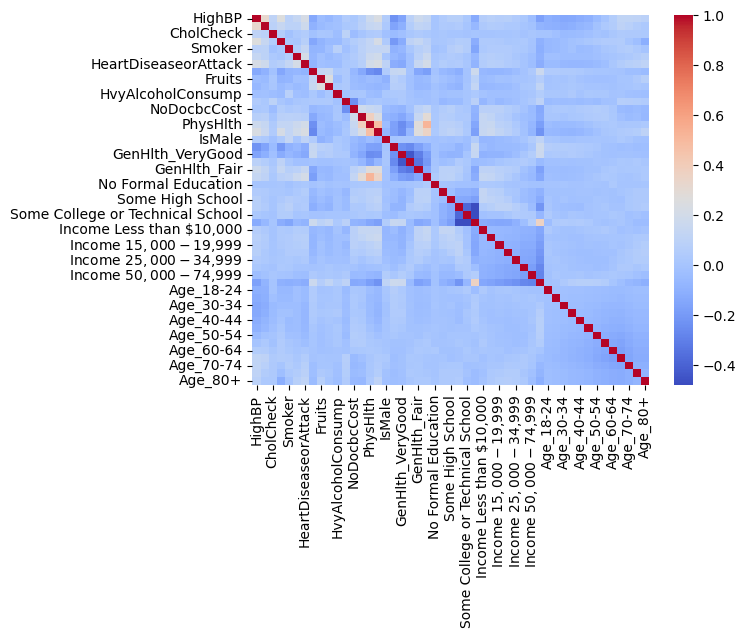

In [40]:
# Calculate the correlation matrix
correlation_matrix = data1_encoded.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

Upon examining the correlation matrix, it's evident that our dataset exhibits low multicollinearity, which is particularly advantageous for our analysis. Given that techniques such as grid search and many predictive models are sensitive to multicollinearity, its minimal presence in our dataset augments the robustness and reliability of our subsequent analyses. This positions us well for a more confident interpretation of the model's results and any parameter tuning using grid search.

<H3> Logistic regression model</H3>

We will now use a grid search as well as testing multiple kernals for the best model utilizing cross validation 

In [68]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# hyperparameters to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],  # These solvers support L1 penalty
}

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=2000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the best model on the full training set
best_logistic_classifier = LogisticRegression(**best_params, max_iter=2000)
best_logistic_classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_logistic_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Data: {accuracy}")

#classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Test Data: 0.7424737656975744

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      2945
         1.0       0.72      0.77      0.75      2868

    accuracy                           0.74      5813
   macro avg       0.74      0.74      0.74      5813
weighted avg       0.74      0.74      0.74      5813



In our pursuit to enhance the logistic regression model, we employed grid search combined with cross-validation to pinpoint the best hyperparameters. Exploring both lasso (L1) and ridge (L2) regularization techniques, along with various regularization strengths (defined by 'C' values of 0.1, 1, and 10) and solvers ('liblinear' and 'saga'), our goal was to uncover a combination that would maximize the model's accuracy on unseen data. The grid search identified the ridge regularization (L2) with a 'C' value of 0.1 and the 'liblinear' solver as the most optimal configuration. Implementing these settings, the model achieved an accuracy of approximately 74% on the test dataset. Delving deeper, the classification report indicates that both classes, 0.0 and 1.0, have comparable precision and recall metrics, meaning the model exhibits consistent performance regardless of the outcome it predicts, with neither a marked bias towards false positives nor false negatives. To summarize, after optimizing hyperparameters with a preference for the lasso regularization, our logistic regression model demonstrates a robust and balanced predictive capability for diabetes outcomes.

<H3>Support Vector Machine Model  </H3>

We will now use a grid search as well as testing multiple kernals for the best model utilizing cross validation 

In [69]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# hyperparameters to search over
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],  # for 'poly' kernel
}

# Create an SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation, display progress updates
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs= 2, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and kernel
best_params = grid_search.best_params_
best_kernel = best_params['kernel']

# Train the best model on the full training set
best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)


# Print results
print(f"Best Kernel: {best_kernel}")
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Data: {accuracy}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Kernel: linear
Best Hyperparameters: {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
Accuracy on Test Data: 0.7428178221228281


<H3> Refiting The Adjusted Models </H3>


<H4> SVM Model</H4>

In [71]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# Create an SVM model with the specified hyperparameters
svm_model = SVC(kernel='linear', C=0.1, probability=True)

# Perform 5-fold cross-validation to get predictions for each fold
y_pred_cv = cross_val_predict(svm_model, X_train_scaled, y_train, cv=5)

# Fit the model on the entire training data for final testing
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test_scaled)

# Generate a classification report for the cross-validated predictions
report_cv = classification_report(y_train, y_pred_cv)

# Generate a classification report for the final model's predictions on the testing data
report_test = classification_report(y_test, y_pred_svm)

print("Classification Report (Cross-Validated):\n", report_cv)
print("\nClassification Report (Testing Data):\n", report_test)


Classification Report (Cross-Validated):
               precision    recall  f1-score   support

         0.0       0.78      0.71      0.74     11828
         1.0       0.72      0.79      0.75     11421

    accuracy                           0.75     23249
   macro avg       0.75      0.75      0.75     23249
weighted avg       0.75      0.75      0.75     23249


Classification Report (Testing Data):
               precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      2945
         1.0       0.72      0.79      0.75      2868

    accuracy                           0.74      5813
   macro avg       0.75      0.74      0.74      5813
weighted avg       0.75      0.74      0.74      5813



<H4> Logistic Regression Model </H4>

In [74]:
# Create a logistic regression model with the specified hyperparameters
logistic_model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')

# Perform 5-fold cross-validation to get predictions for each fold
y_pred_cv = cross_val_predict(logistic_model, X_train_scaled, y_train, cv=5)

# Fit the model on the entire training data for final testing
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Generate a classification report for the cross-validated predictions
report_cv = classification_report(y_train, y_pred_cv)

# Generate a classification report for the final model's predictions on the testing data
report_test = classification_report(y_test, y_pred_logistic)

print("Classification Report (Cross-Validated):\n", report_cv)
print("\nClassification Report (Testing Data):\n", report_test)

Classification Report (Cross-Validated):
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     11828
         1.0       0.73      0.77      0.75     11421

    accuracy                           0.75     23249
   macro avg       0.75      0.75      0.75     23249
weighted avg       0.75      0.75      0.75     23249


Classification Report (Testing Data):
               precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      2945
         1.0       0.72      0.77      0.75      2868

    accuracy                           0.74      5813
   macro avg       0.74      0.74      0.74      5813
weighted avg       0.74      0.74      0.74      5813



<H2> Model Advantages </H2>

<H4>Advantages of each model</H4>

Support Vector Classifier (SVC) with Linear Kernal is able to maximize the margin between two different classes so that we can get better generalization on unseen data. With SVC having the maximum margin it is able to handle outliers which in turn has less influence on the decision boundary. SVC is also robust to overfitting in high demensions,  especially when there is a clear margin of separation.

Logistic regression is able to use a feature selection like ridge to regulate and introduce sparsity. Using ridge we can drive some feature coefficients to close to zero, which in turn improves interpretability and reduces overfitting. The model can also set the parameter C using the scikit-learn library which is the inverse of the regulation strength. In our case we used "c=0.1" which is a relativity stronger regularization than a C=1 which is a strong regularization. This parameter allows use to fit the data more closely and possibly let us capture more complex relationships, however this could potentially overfit our data. The logistic regression can also scale big datasets relatively easily along with a straightforward training process, especially when comparing to more complex models.

<H4> Comparing Model Performance </H4>

After delving into the performances of both the Logistic Regression Model and Support Vector Classifier we were able compare the accuracy and recall. The Logistic Regression classification report on the preditor variable Non-diabetic(0) showed an accuracy of .75 and a recall of .72, with the SVC reporting an accuracy of .75 and a recall of .70. As for the diabetic(1) report, the Logistic Regression has an accuracy of .74 and a recall of .76, with the SVC reporting an accuracy of .74 and a recall of .79. In conclusion we were able to see that the Logistic Regression has a lower accuracy rate in terms of non-diabetic patients when compared to the SVC accuracy rate. However, when examining the recall for non diabetic patients, we can see that the SVC under performed compared to the regression model. That being said, the recall for diabetic patients, we can that the the SVC performed much better when compared to the regression model.

In terms of training time, fitting both models was relatively fast, however when trying to find the best parameters with a 5 fold cross validation the logistic model was much faster being 10 to 15 minutes with max iterations of 2000. On the other hand, using 2 cpu cores the SVC grid search took about 8 hours. So when it comes to hypertuning logistic is faster unless you take a subset and run SVC

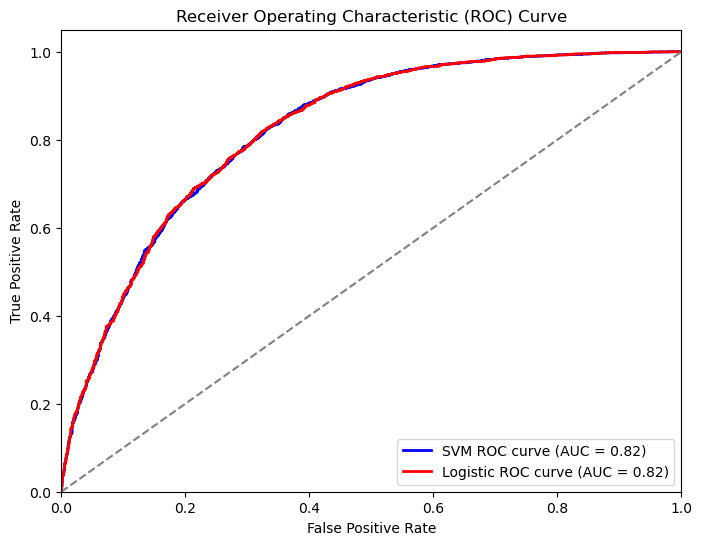

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities for the positive class
y_pred_svm_prob = svm_model.predict_proba(X_test_scaled)[:, 1]
y_pred_logistic_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_prob)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm_prob)

# Calculate ROC curve and AUC for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic_prob)
roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_logistic, tpr_logistic, color='red', lw=2, label=f'Logistic ROC curve (AUC = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

When examining the ROC Curve above, we are able to see that the SVM AUC and the Logistic AUC are both .82, which tells us that they have the same overall discriminative ability. That being said, the individual performance at a certain threshhold might differ. When comparing our classification statitic report of accuracy and recall we were able to see perfromance differences in both model, however, looking at the ROC curves show no deviation from each other.

<H2> Interpret Feature Importance </H2>

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

In [108]:
# interpret the weights

# iterate over the coefficients
weights = logistic_model.coef_.T # take transpose to make a column vector
variable_names = data1_encoded.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

HighBP has weight of 0.3257649216644466
HighChol has weight of 0.2597171012781433
CholCheck has weight of 0.21698357414010563
BMI has weight of 0.5043244558588751
Smoker has weight of -0.015777711508436522
Stroke has weight of 0.05195359002995206
HeartDiseaseorAttack has weight of 0.08806843650625974
PhysActivity has weight of 0.0014389621592189655
Fruits has weight of -0.004635173187877183
Veggies has weight of -0.011711823891083073
HvyAlcoholConsump has weight of -0.1859911289154708
AnyHealthcare has weight of 0.0018006863450877335
NoDocbcCost has weight of -0.02233641136296938
MentHlth has weight of -0.017151596480005322
PhysHlth has weight of -0.022382273337668596
DiffWalk has weight of 0.05410167404530495
IsMale has weight of 0.15062027925940952
GenHlth_Excellent has weight of -0.3900298908590957
GenHlth_VeryGood has weight of -0.18970119230403526
GenHlth_Good has weight of 0.10536277380712862
GenHlth_Fair has weight of 0.2717352165065418
GenHlth_Poor has weight of 0.2116305014960

### Features that Increase the Chance of Having Diabetes:

#### HighBP (Weight: 0.326)
High blood pressure (HighBP) also increases the probability of the positive class. Individuals with high blood pressure are more likely to have diabetes. This is because diabetes damages the small blood vessels in your body over time, which causes the walls of the blood vessels to stiffen. This increases pressure, which leads to the condition of high blood pressure.
#### HighChol (Weight: 0.260)
High cholesterol contributes to an increased likelihood of having diabetes, likely due to its impact on blood vessel health.

#### CholCheck (Weight: 0.217).
Having a cholesterol check increases the probability of the diabetic class. This suggests that individuals who have their cholesterol checked are more likely to have diabetes. Doctors recommend annual cholesterol checks for individuals with type 2 diabetes or individuals who have had type 1 diabetes for at least five years. Since cholesterol checks are a part of routine health procedures for diabetics, this finding meets our expectation that this feature has high importance. 

#### BMI (Weight: 0.504)
Higher Body Mass Index (BMI) values are strongly associated with an increased probability of having diabetes, indicating obesity as a significant risk factor.

#### Stroke (Weight: 0.052) & HeartDiseaseorAttack (Weight: 0.088)
These variables are associated with an increased probability of the positive class. Individuals who have experienced a stroke or heart disease/attack are more likely to be classified as having diabetes. As mentioned with the high blood pressure, the damage that occurs to blood vessels over time in individuals with diabetes increases their risk of heart disease and stroke.

#### DiffWalk (Weight: 0.054)
Difficulty walking is associated with an increased probability of the positive class. This suggests that individuals with difficulty walking may have a higher likelihood of having diabetes. The medical explanation for this is that chronically elevated blood sugars can damage nerves that tell muscles how to move. This can lead to muscle weakness.

#### IsMale (Weight: 0.151)
Being male increases the probability of the positive class, indicating that gender is a factor in the outcome prediction. According to the National Center for Biotechnology Information (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9408508/), there are many different factors for this outcome, both biological and environmental. For example, one environmental factor is how doctors approach diagnosis for women (many doctors use a woman’s weight as a cause rather than a symptom for other medical ailments, so they are less likely than a man of the same weight symptoms to be diagnosed as diabetic).

### Features that Decrease the Chance of Having Diabetes:

#### GenHlth_Excellent (Weight: -0.390) and other "GenHlth" variables
Having excellent general health is associated with a significantly decreased probability of having diabetes. Similarly, other levels of general health (VeryGood, Good, Fair, Poor) also have negative coefficients, indicating that better general health is associated with a reduced likelihood of the outcome. Someone’s excellent health has higher feature importance to the model because it’s likely that the other health variables like “high blood pressure” are negative, so the model relies heavier on the general health factor to predict non-diabetes.

#### Age (various weights)
Since all age variables have negative coefficients, an increase in age decreases the probability of the individual having diabetes. However, younger categories have higher negative coefficients, suggesting that younger age groups are more important for predicting the target variable than older age groups. Since other health variables are associated with higher ages, it makes sense that the model relies more on variables like high cholesterol and high blood pressure as age increases. 
#### HvyAlcoholConsump (Weight: -0.186)
Heavy alcohol consumption decreases the probability of the positive class. Individuals who consume alcohol heavily are less likely to be classified as having diabetes. It is reasonable to assume that this is an effect of a diabetes diagnosis because diabetics are often told by doctors to avoid heavy drinking, because it can cause ketoacidosis (which is life-threatening) and hypertriglyceridemia (which greatly increases the risk of heart disease). 

#### Education (various weights)
All the weights of the education coefficients are negative, indicating that as education increases, the probability of having diabetes decreases. Most education features have a weight of -1.1 or -1.2, but “No formal education” has a weight of -0.5, indicating that having no formal education is less important to the model than the other education features. As we see with age and income, there is a point in the scale where the other features are “turned on” and become more important. One assumption we can make is that because education plays a role in the amount of medical knowledge someone has, someone with no formal education may avoid the doctor due to finances, mistrust, rural availability of a doctor, or simply ignorance. The education factor may cause a gap in formal diagnoses and/or such significant delay in treatment that health issues are exacerbated.
HERE we see a trend as education increases chances decrease
#### Income (various weights)
Income categories also have negative coefficients, suggesting that higher income levels are associated with a reduced probability of having diabetes. This could indicate that individuals with higher income are less likely to have the outcome being predicted.
### Features that Are Not Important in Predicting Diabetes:

#### Smoker (Weight: -0.016)
The reason that smoking is considered a risk factor for diabetes is because it can make managing the disease and regulating insulin levels more difficult. High levels of nicotine can lessen the effectiveness of insulin, causing smokers to need more insulin to regulate blood sugar levels. In the model, however, it is not very important for predicting whether the individual has diabetes or not. Because smoking is a lifestyle choice, there are a host of factors not measured here for why people are smokers that have very little to do with diabetes.

#### Diet and Activity Choices (Weight: 0.001 for Physical activity and -0.005 for Fruits and Veggie consumption (Weight: -0.012)
We could remove physical activity and fruit/veggie consumption from the model and it would not change the outcome. This may have to do with the usefulness of the data gathered – people who eat at least one fruit or veggie a day probably have a more well-rounded diet than those who said they did not, but a healthy diet does not necessarily have much to do with diabetes. Patients with Type 2 diabetes can manage the disease with diet, including eating fruits and vegetables every day, but there are plenty of people who make healthy diet choices regardless of a diabetic diagnosis. There are environmental factors for someone’s dietary choices, like how some cultures incorporate fruits and vegetables better than other cultures. Likewise, physical activity may not necessarily mean “working out to lose weight” or “managing diabetes symptoms” – physically active can also mean sports or fitness goals like weight lifting. People have a variety of motivations for being physically active, so we would not expect it to have much correlation with a diabetes diagnosis

#### AnyHealthcare (Weight: 0.002) and NoDocbcCost (Weight: -0.022)
The presence or absence of healthcare coverage and doctor costs have relatively low impact on predicting diabetes.

#### MentHlth (Weight: -0.017) and PhysHlth (Weight: -0.022)
This feature measures perception, which is highly subjective, and thus not reliable for prediction at all. Two people can have the same mental or physical health indicators and have wildly different perceptions of that. We would not expect this feature to be important to the model and these low feature importance numbers meet our expectation. 

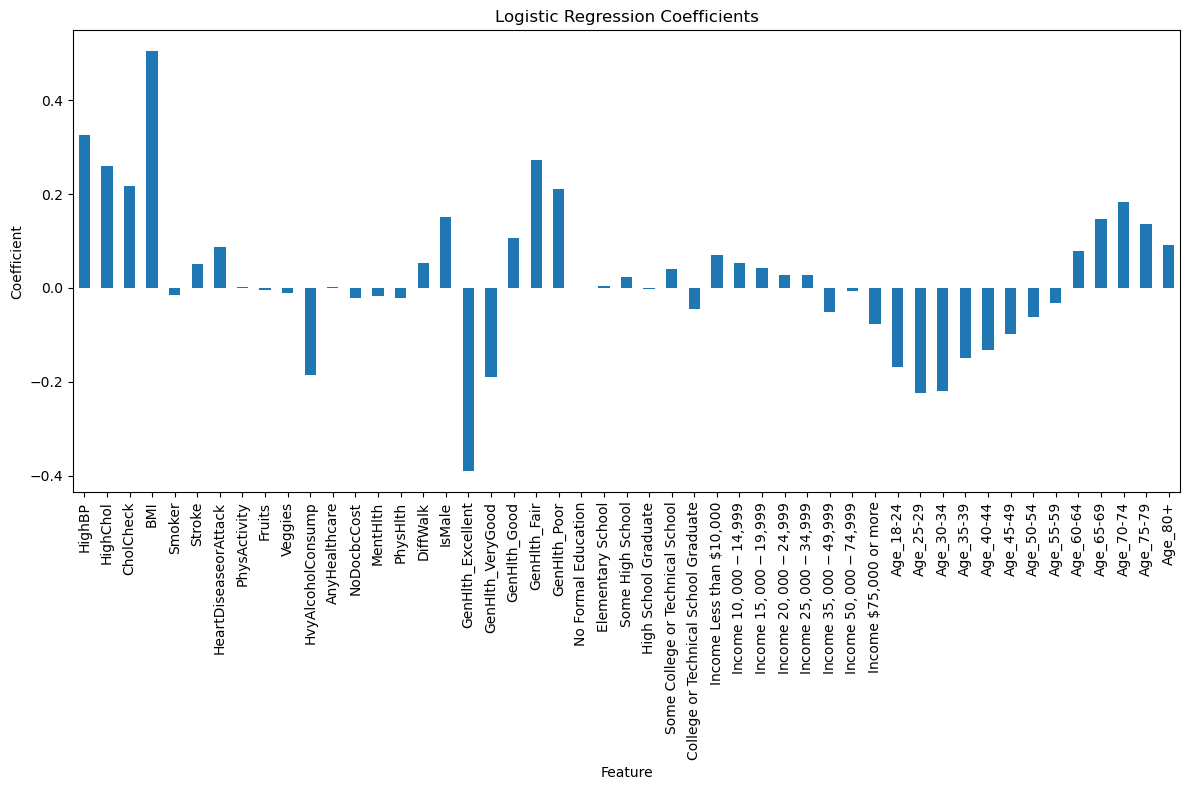

In [109]:

# Extract feature names from 'data1_encoded'
feature_names = data1_encoded.columns

# Extract the coefficients corresponding to the features
coefficients = logistic_model.coef_[0]

# Create a Pandas Series with feature names as index and coefficients as values
weights = pd.Series(coefficients, index=feature_names)

# Plot the feature coefficients
plt.figure(figsize=(12, 8))
weights.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The bar graph above reveal vital insights into the diabetes predictors and help reiterate the coefficients mentioned before. For instance, High blood pressure ('HighBP') and cholesterol ('HighChol') stand out as major risk factors, while the significant weight of 'CholCheck' indicates frequent cholesterol checkers might be more at risk. Surprisingly, 'Smoker' and 'HvyAlcoholConsump' have negative weights, suggesting non-heavy drinkers or smokers might be more prone to diabetes. Socioeconomic variables show that higher education and income levels correlate with decreased diabetes risk. Additionally, while younger age brackets (18-44) manifest a reduced risk, advancing age increases susceptibility. This analysis underlines the intricate interplay of biological, socioeconomic, and lifestyle factors in predicting diabetes.

<H2> Interpret Support Vectors </H2>

In [112]:
# Extract coefficients and feature names
coefficients = svm_model.coef_[0]
feature_names = data1_encoded.columns

# Print coefficients with feature names
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

HighBP: 0.31147646313619326
HighChol: 0.20302823131619596
CholCheck: 0.15198889327523313
BMI: 0.38715836050015223
Smoker: -0.0005496839068055009
Stroke: 0.04181422960772649
HeartDiseaseorAttack: 0.08367886220272289
PhysActivity: -0.004837657289954056
Fruits: -0.0033549884741634617
Veggies: -0.015406071258516472
HvyAlcoholConsump: -0.1608791949314235
AnyHealthcare: 7.468958000591414e-05
NoDocbcCost: -0.017011598113510537
MentHlth: -0.016206770803586533
PhysHlth: -0.022234756335655324
DiffWalk: 0.03942918918789398
IsMale: 0.1137908629927788
GenHlth_Excellent: -0.2939278599090912
GenHlth_VeryGood: -0.1914136666054087
GenHlth_Good: 0.11032955917893614
GenHlth_Fair: 0.21975309671088086
GenHlth_Poor: 0.16488431119103697
No Formal Education: 0.0028534003183190524
Elementary School: -0.0018571161986053152
Some High School: 0.01718575999798999
High School Graduate: -0.00042185732988017643
Some College or Technical School: 0.03520817979324781
College or Technical School Graduate: -0.039255162346

### Features for SVM Model: Coefficients for Diabetes Prediction

#### Features that Increase the Chance of Having Diabetes:

- **HighBP (Weight: 0.311)**
  High blood pressure increases the probability of having diabetes due to the associated damage to blood vessels and increased pressure.

- **HighChol (Weight: 0.203)**
  High cholesterol contributes to an increased likelihood of having diabetes, likely due to its impact on blood vessel health.

- **CholCheck (Weight: 0.152)**
  Individuals who have had cholesterol checks are more likely to have diabetes, aligning with medical guidelines for diabetes management.

- **BMI (Weight: 0.387)**
  Higher Body Mass Index (BMI) values are strongly associated with an increased probability of having diabetes, indicating obesity as a significant risk factor.

- **Stroke (Weight: 0.042) & HeartDiseaseorAttack (Weight: 0.084)**
  Experiencing a stroke or heart disease/attack increases the probability of having diabetes, possibly due to shared risk factors and complications.

- **DiffWalk (Weight: 0.039)**
  Difficulty walking is linked to a higher probability of having diabetes, possibly due to nerve damage caused by chronically elevated blood sugar levels.

- **IsMale (Weight: 0.114)**
  Being male increases the probability of having diabetes, indicating a gender-related factor in diabetes prediction.

#### Features that Decrease the Chance of Having Diabetes:

- **GenHlth_Excellent (Weight: -0.294) and other "GenHlth" variables**
  Excellent general health and better general health levels significantly decrease the probability of having diabetes, suggesting that individuals in better overall health are less likely to have diabetes.

- **Age (various weights)**
  Older age groups are less likely to have diabetes, with younger age groups having higher negative coefficients, emphasizing the importance of age as a predictor.

- **Income (various weights)**
  Higher income levels are associated with a reduced probability of having diabetes, suggesting that individuals with higher incomes may be less likely to have diabetes.

#### Features that Are Not Important in Predicting Diabetes:

- **Smoker (Weight: -0.001)**
  Smoking has a minimal impact on predicting diabetes, even though it can have detrimental effects on overall health.

- **PhysActivity (Weight: -0.005)**
  Physical activity has a nearly neutral weight, indicating that its level does not strongly influence the likelihood of having diabetes in this model.

- **Fruits (Weight: -0.003) and Veggies (Weight: -0.015)**
  Consumption of fruits and vegetables has negative weights but only a minor impact on predicting diabetes.

- **AnyHealthcare (Weight: 0.00007) and NoDocbcCost (Weight: -0.017)**
  The presence or absence of healthcare coverage and doctor costs have relatively low impact on predicting diabetes.

- **MentHlth (Weight: -0.016) and PhysHlth (Weight: -0.022)**
  Perception of mental and physical health has negative weights but very low impact on prediction, indicating that subjective health assessments do not strongly influence diabetes likelihood in this model.

- **Education (various weights)**
  Education levels, while negatively weighted, do not play a significant role in predicting diabetes in this model.


<Axes: title={'center': 'SVM Coefficients with Feature Names'}, xlabel='Feature', ylabel='Coefficient'>

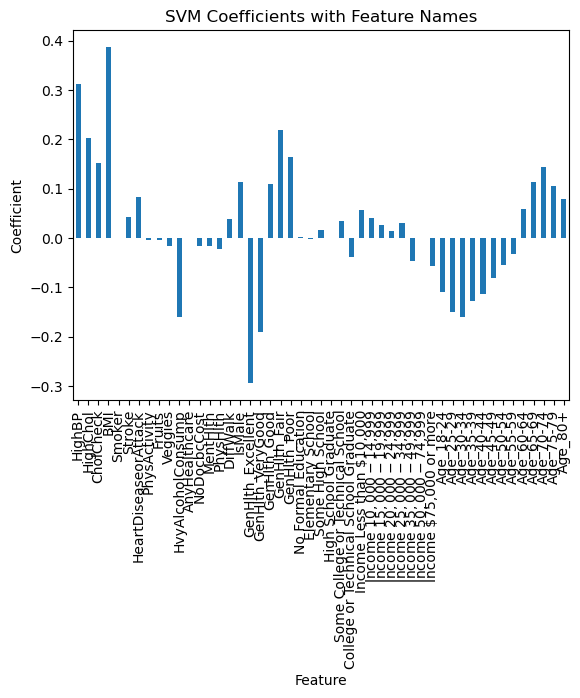

In [107]:
# Create a Pandas Series with coefficients and feature names as index
weights = pd.Series(coefficients, index=feature_names)

# Plot the feature coefficients with feature names
weights.plot(kind='bar', xlabel='Feature', ylabel='Coefficient', title='SVM Coefficients with Feature Names')

The chart above provides a visual representation of our SVM vectors. Similar to the logistic regression weights, we can observe that 'Gen Health Excellent' has the most significant negative impact on diabetes prediction. Notably, just like in the previous model, BMI stands out as the most substantial contributor with a vector weight of 0.4. This weight indicates that BMI plays a critical role in predicting diabetes.

Furthermore, it's evident that there is a clear trend as age increases, the likelihood of developing diabetes also increases. Age appears to be a consistent factor across different models, indicating its importance in diabetes prediction

In [115]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = data1_encoded.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = data1_encoded.iloc[svm_model.support_,:].copy()

df_support['Diabetes_binary'] = y[svm_model.support_] # add back in the 'Survived' Column to the pandas dataframe
data1_encoded['Diabetes_binary'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13500 entries, 1 to 23903
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   HighBP                                13500 non-null  float64
 1   HighChol                              13500 non-null  float64
 2   CholCheck                             13500 non-null  float64
 3   BMI                                   13500 non-null  float64
 4   Smoker                                13500 non-null  float64
 5   Stroke                                13500 non-null  float64
 6   HeartDiseaseorAttack                  13500 non-null  float64
 7   PhysActivity                          13500 non-null  float64
 8   Fruits                                13500 non-null  float64
 9   Veggies                               13500 non-null  float64
 10  HvyAlcoholConsump                     13500 non-null  float64
 11  AnyHealthcare  

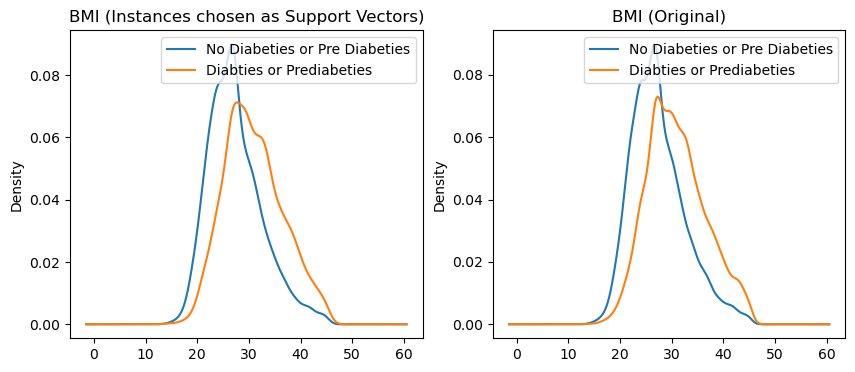

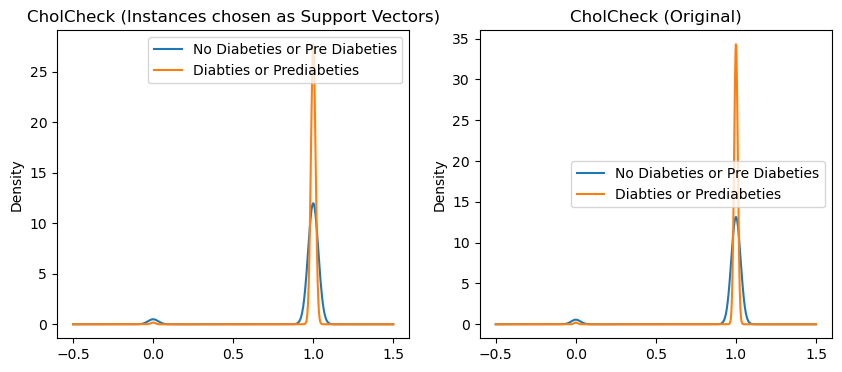

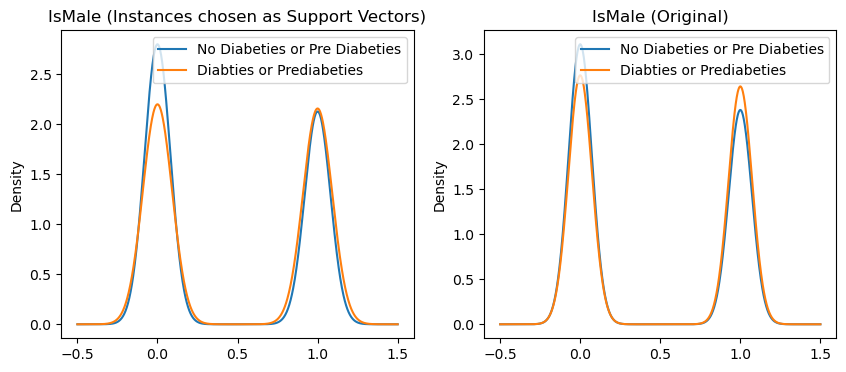

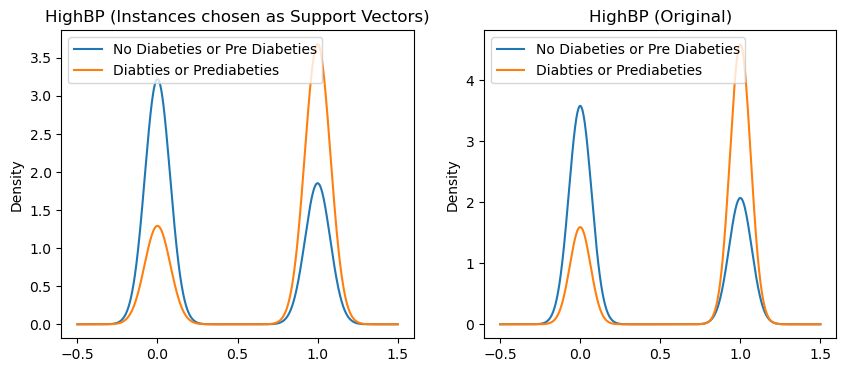

In [116]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['Diabetes_binary'])
df_grouped = data1_encoded.groupby(['Diabetes_binary'])

# plot KDE of Different variables
vars_to_plot = ['BMI','CholCheck','IsMale','HighBP']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['No Diabeties or Pre Diabeties','Diabties or Prediabeties'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['No Diabeties or Pre Diabeties','Diabties or Prediabeties'])
    plt.title(v+' (Original)')

<H3> Analysis</H3>

In the charts presented above, we provide a comparative view of our original features and the features derived from our Support Vector Machine (SVM) model. Remarkably, they appear nearly identical. This similarity can be attributed to several factors, which we will explore further.

<H4> Linear Kernal </H4>

The choice of a linear kernel for this classification task plays a pivotal role in explaining the observed similarity. The linear kernel assumes that the classes are linearly separable, implying that the decision boundary should be a straight line in feature space. Given that our data can be effectively separated by a linear boundary, the decision boundary produced by the SVM model closely mirrors that of our original data.    
    
<H4> Benefits of Scaling </H4>
    
Another contributing factor to the resemblance between the original and SVM-transformed features is the use of scaled data. SVM models are known to be sensitive to feature scales. By scaling our data appropriately, we achieved more consistent and predictable decision boundaries. This scaling process ensures that no single feature dominates the SVM's decision-making process.
    
<H4>Model Performance </H4>
Our SVM model's Area Under the Curve (AUC) of 0.82 indicates that it performs reasonably well in distinguishing between the classes. This value suggests that the model can effectively separate instances into the two classes, even though the decision boundaries closely resemble those of the original data.

<H3> Additional Analysis ( BMI & Future Age/Income collection) </H3>

<H4> BMI Decission Boundary </H4>    
One intriguing observation is related to the feature BMI. In the plots, it is evident that the decision boundaries for the classes overlap around the mean BMI rate. This overlap suggests that both the model and the original data find it challenging to discriminate instances around this particular BMI range. This phenomenon likely contributes to a reduction in model accuracy for cases falling within this region.
    
<H4> Future Age and Income Data Collection </H4>
Upon examining the BMI plot, it becomes evident that our model encounters classification challenges around the average BMI range. It's noteworthy that the age and income variables were originally collected as categorical by the CDC, and within our dataset, they represented the only potential continuous variables. Consequently, the transformation of these variables into discrete categories resulted in a loss of granularity and detailed information.

Given this context, it raises the question of whether our model would face difficulties in distinguishing specific age ranges or income levels. The feature weights provide valuable insights, indicating a general trend that as income increases, the likelihood of being classified as having diabetes or prediabetes decreases. For example, individuals with an income less than 10,000 have a weight of 0.23, while those with an income exceeding 75,000 have a weight of -0.21.

Looking ahead, it would be beneficial for future data collection efforts to consider obtaining age and income as continuous variables rather than categorical ones. This approach would help prevent the loss of granularity observed in our current analysis and enable a more nuanced examination of whether there are specific age or income points at which our model may struggle with classification decisions.